___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

***Pen-Based Recognition of Handwritten Digits***
This digit database was created by collecting 250 samples from 44 writers. WACOM PL-100V pressure sensitive tablet used with an integrated LCD display and a cordless stylus. The input and display areas are located in the same place. Attached to the serial port of an Intel 486 based PC, it allows us to collect handwriting samples. The tablet sends $x$ and $y$ tablet coordinates and pressure level values of the pen at fixed time intervals (sampling rate) of 100 miliseconds. 

These writers are asked to write 250 digits in random order inside boxes of 500 by 500 tablet pixel resolution. Subject are monitored only during the first entry screens. Each screen contains five boxes with the digits to be written displayed above. Subjects are told to write only inside these boxes. If they make a mistake or are unhappy with their writing, they are instructed to clear the content of a box by using an on-screen button. The first ten digits are ignored because most writers are not familiar with this type of input devices, but subjects are not aware of this.

In this study, researchers use only ($x, y$) coordinate information. The stylus pressure level values are ignored. The raw data that we capture from the tablet consist of integer values between 0 and 500 (tablet input box resolution). The new coordinates are such that the coordinate which has the maximum range varies between 0 and 100. Usually $x$ stays in this range, since most characters are taller than they are wide.

Attribute information
In order to train and test our classifiers, we need to represent digits as constant length feature vectors. A commonly used technique leading to good results is resampling the ( x_t, y_t) points. Temporal resampling (points regularly spaced in time) or spatial resampling (points regularly spaced in arc length) can be used here. Raw point data are already regularly spaced in time but the distance between them is variable. 

- Data reference link : https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits
---

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (hand digit recognation) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine,Desicion Tree, Random Forest, XGBoost *** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*

#### 3. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

In [70]:
pip install -U matplotlib==3.5


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### *ii. Load Dataset*

In [71]:
df = pd.read_csv("pendigits_txt.csv")
df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


#### *iii. Explore Data*
- Focus on numerical
- Focus on Target Variable (class)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   10992 non-null  int64
 1   input2   10992 non-null  int64
 2   input3   10992 non-null  int64
 3   input4   10992 non-null  int64
 4   input5   10992 non-null  int64
 5   input6   10992 non-null  int64
 6   input7   10992 non-null  int64
 7   input8   10992 non-null  int64
 8   input9   10992 non-null  int64
 9   input10  10992 non-null  int64
 10  input11  10992 non-null  int64
 11  input12  10992 non-null  int64
 12  input13  10992 non-null  int64
 13  input14  10992 non-null  int64
 14  input15  10992 non-null  int64
 15  input16  10992 non-null  int64
 16  class    10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [73]:
df.shape

(10992, 17)

In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
input1,10992.0,38.814320,34.257783,0.0,6.0,32.0,65.0,100.0
input2,10992.0,85.120269,16.218571,0.0,76.0,89.0,100.0,100.0
input3,10992.0,40.605622,26.342984,0.0,20.0,40.0,58.0,100.0
input4,10992.0,83.774199,19.163646,0.0,72.0,91.0,100.0,100.0
input5,10992.0,49.770378,34.100515,0.0,18.0,53.0,78.0,100.0
input6,10992.0,65.573144,26.996688,0.0,49.0,71.0,86.0,100.0
input7,10992.0,51.220251,30.576881,0.0,28.0,53.5,74.0,100.0
input8,10992.0,44.498999,29.906104,0.0,23.0,43.0,64.0,100.0
input9,10992.0,56.868541,34.135530,0.0,29.0,60.0,89.0,100.0
input10,10992.0,33.695961,27.251548,0.0,7.0,33.0,54.0,100.0


In [75]:
for col in df.columns:
    print("Column", col, "has", df[col].nunique(), "unique values")

Column input1 has 101 unique values
Column input2 has 96 unique values
Column input3 has 101 unique values
Column input4 has 98 unique values
Column input5 has 101 unique values
Column input6 has 101 unique values
Column input7 has 101 unique values
Column input8 has 101 unique values
Column input9 has 101 unique values
Column input10 has 101 unique values
Column input11 has 101 unique values
Column input12 has 101 unique values
Column input13 has 101 unique values
Column input14 has 101 unique values
Column input15 has 101 unique values
Column input16 has 101 unique values
Column class has 10 unique values


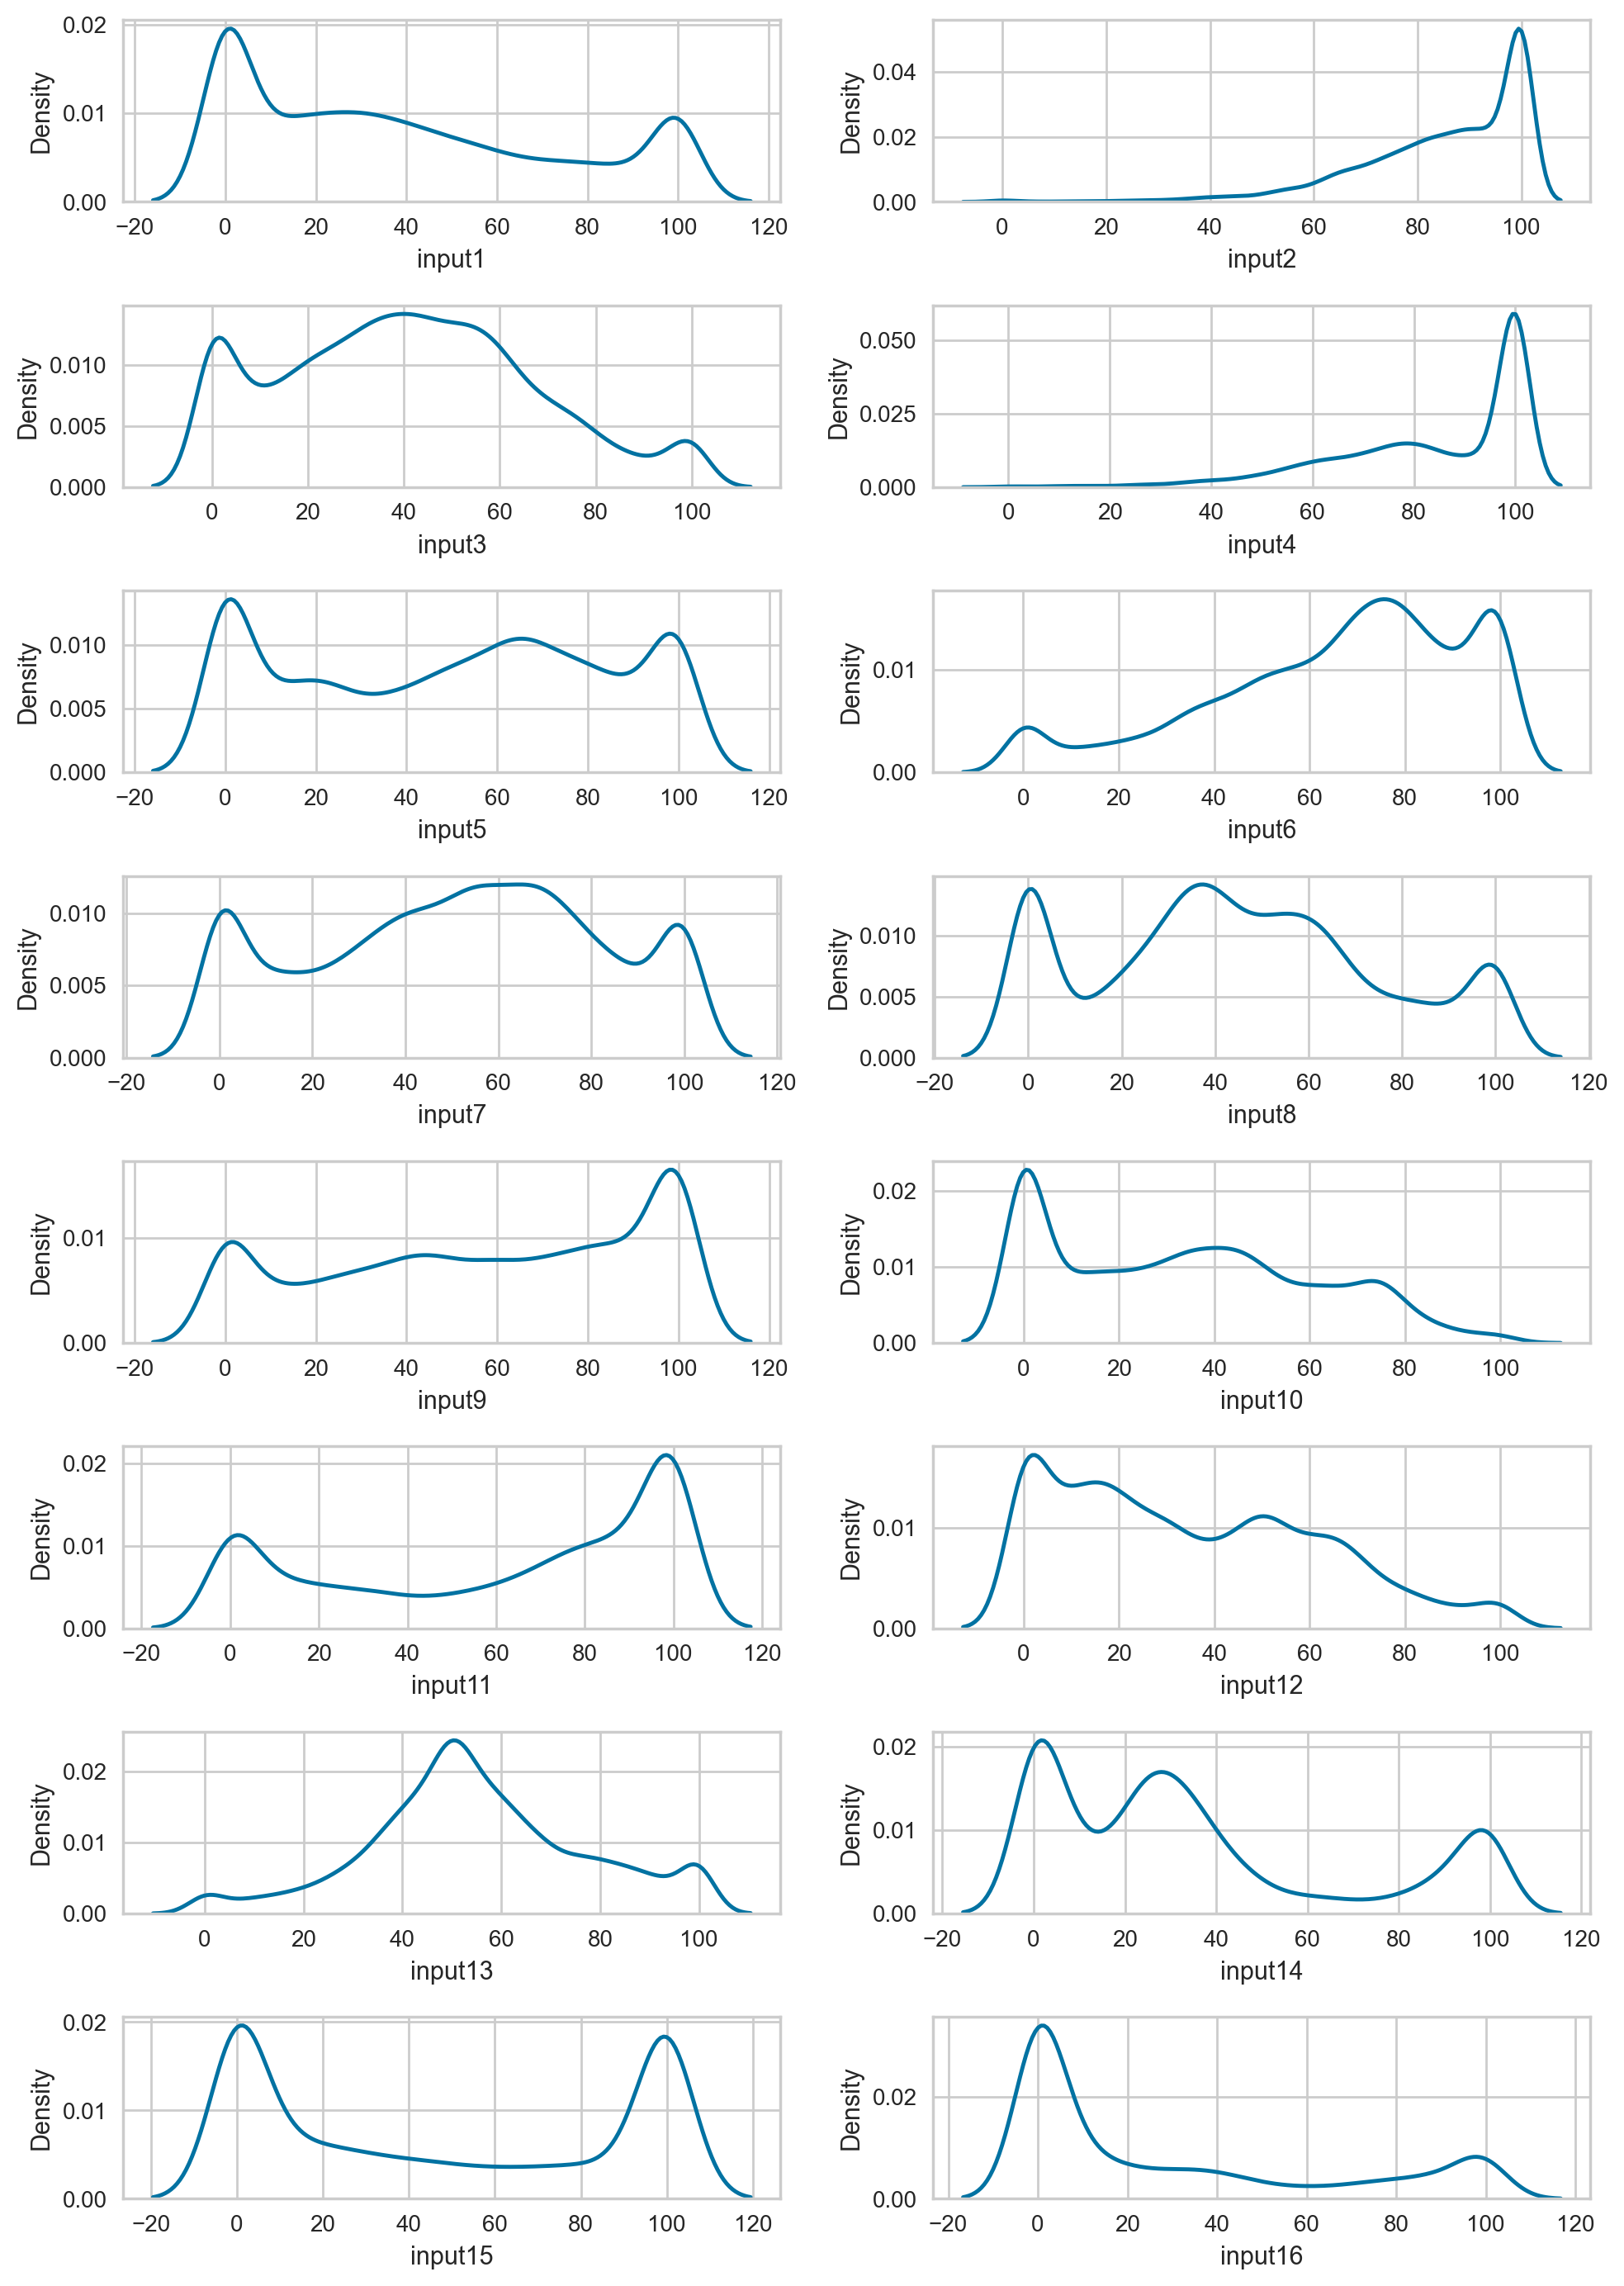

In [76]:
#Distribution to numerical features
fig = plt.figure(figsize=(10,14), dpi=200)
for i, col in enumerate(df.columns[:-1]):
        plt.subplot(8,2,i+1)
        sns.kdeplot(df[col])
plt.tight_layout();

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [77]:
df.isnull().sum().any() #There is no missing value

False

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target ("class") classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

<AxesSubplot:>

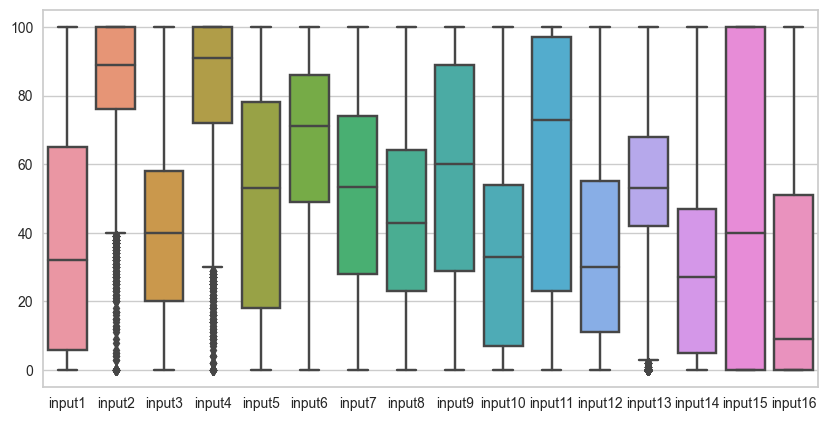

In [78]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df.drop("class", axis=1))

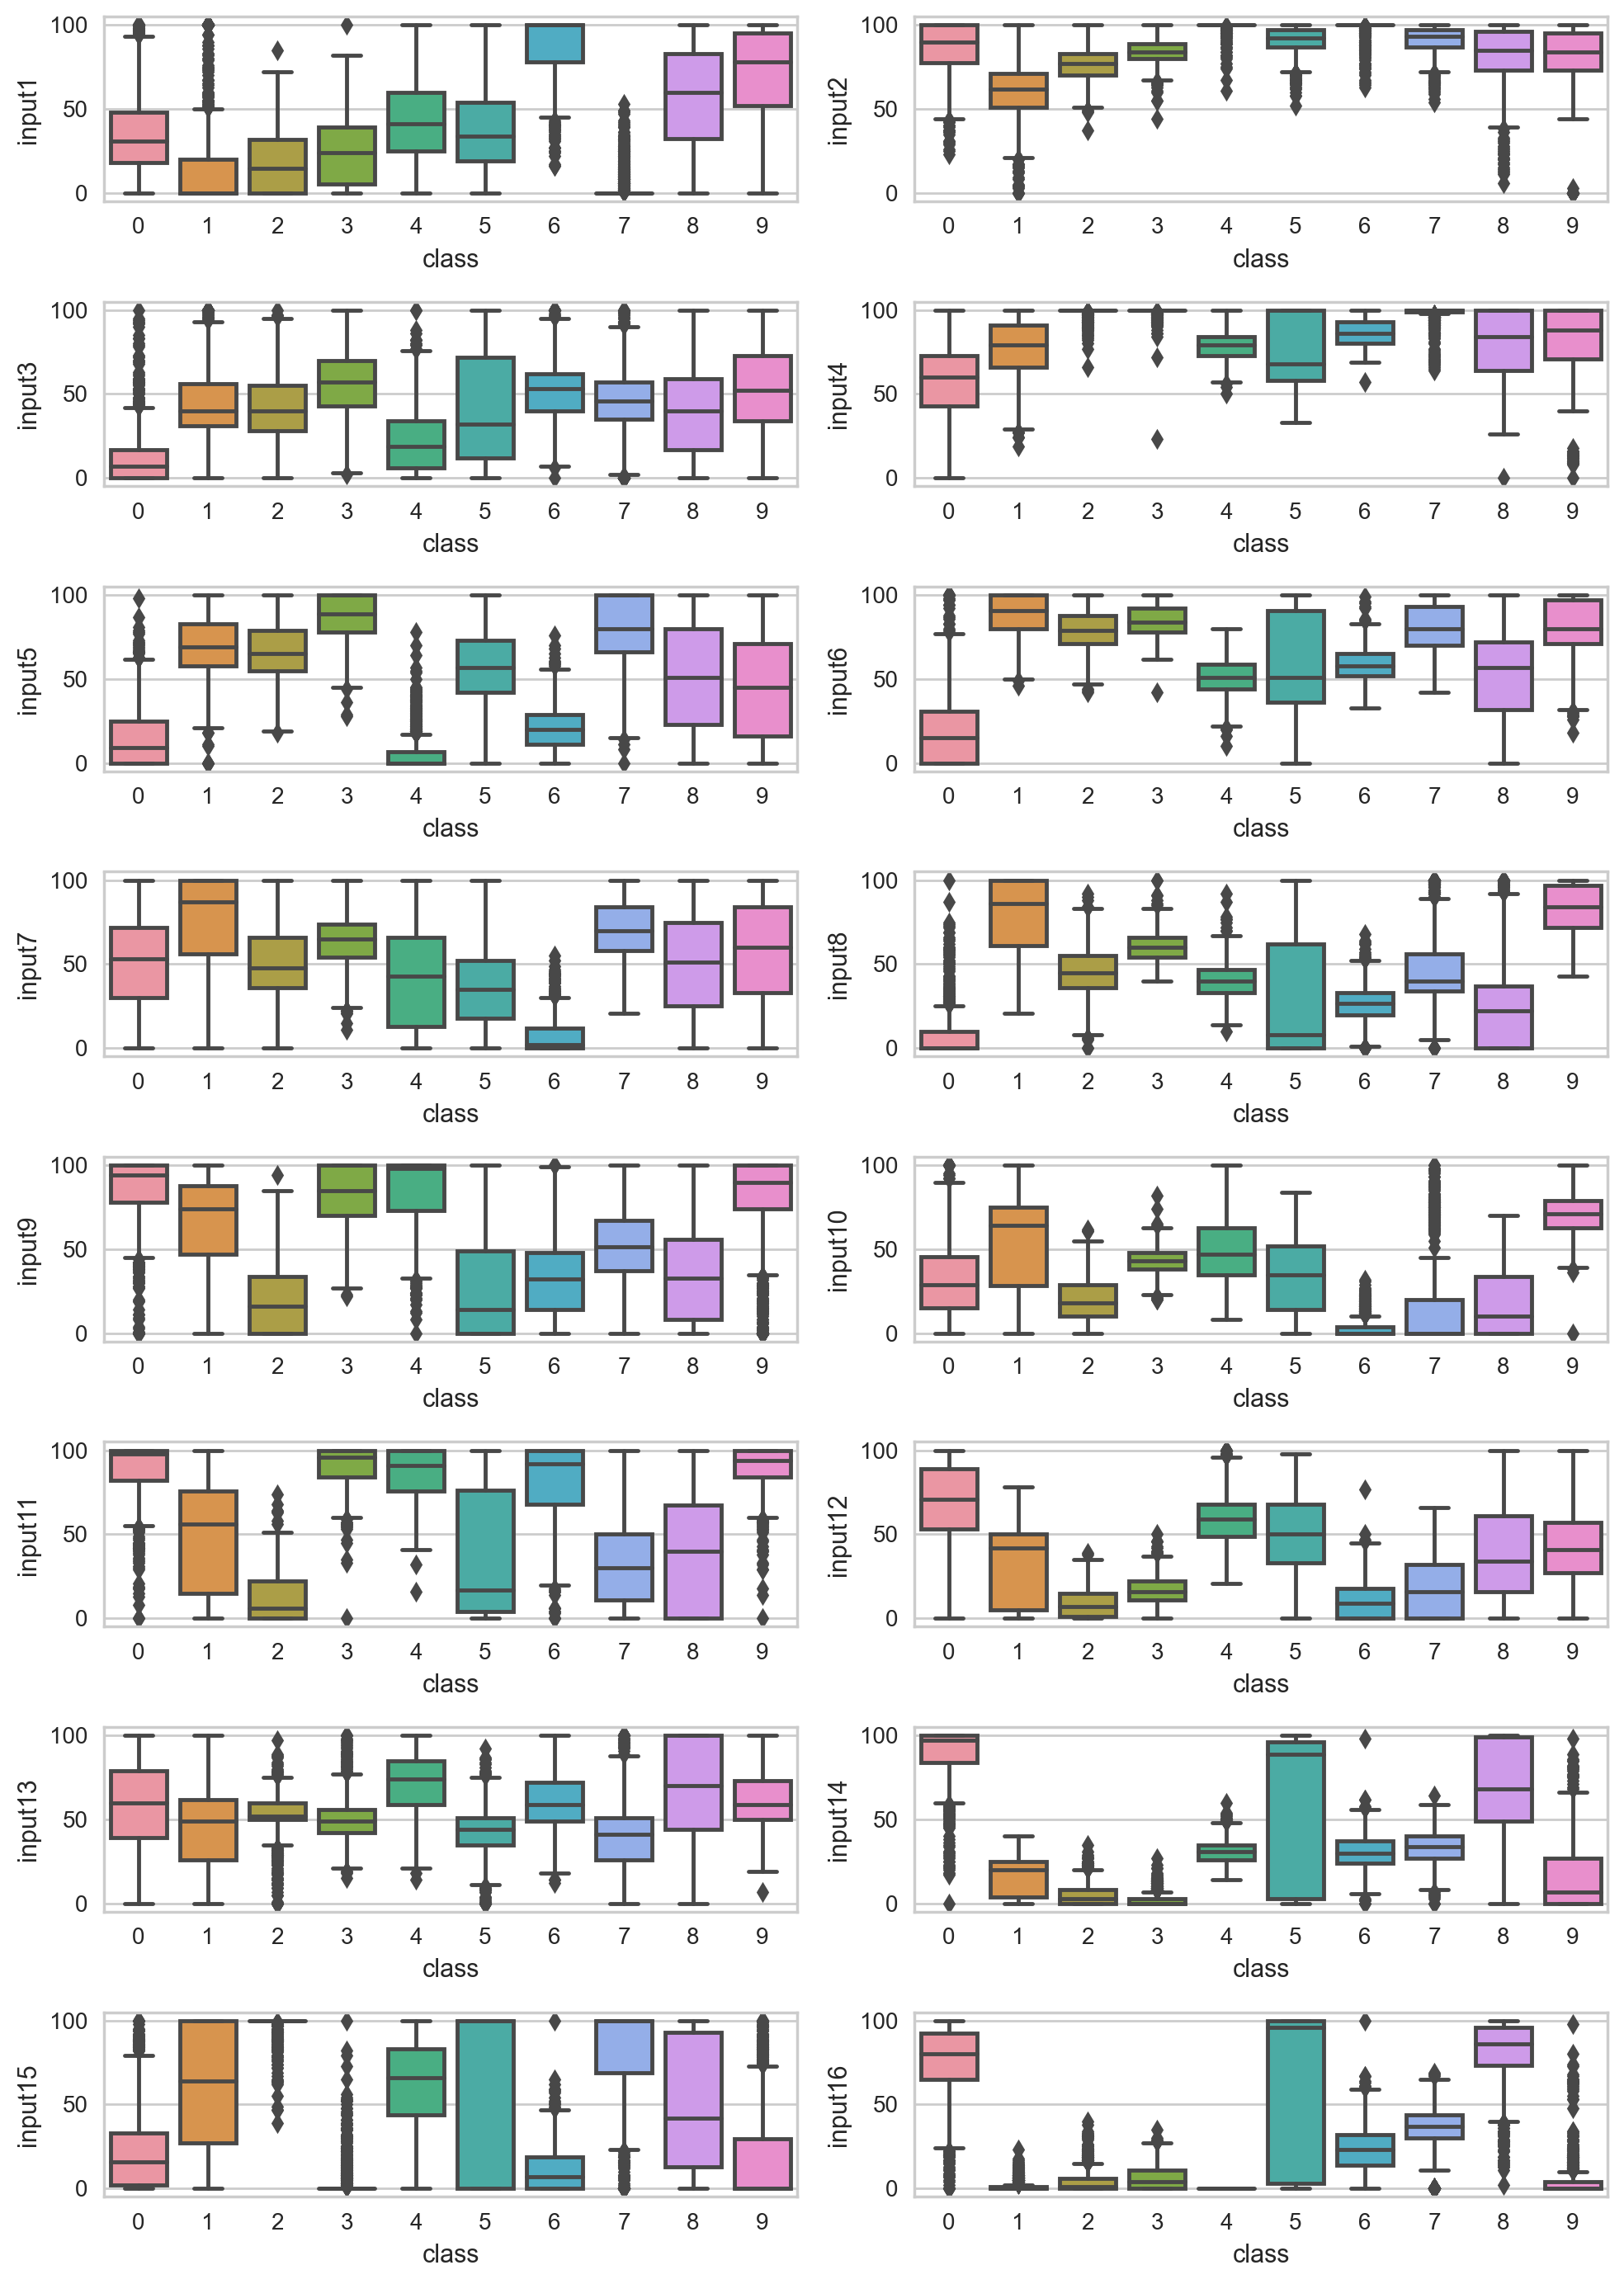

In [79]:
fig = plt.figure(figsize=(10,14), dpi=200) #visually examine for numeric features detecting outliers for each class
for i, col in enumerate(df.columns[:-1]):
        plt.subplot(8,2,i+1)
        sns.boxplot(y= df[col], x = df["class"], data=df)
plt.tight_layout();

In [80]:
#we can produce a function to get the number of outliers with respectively in each class.
def detect_outliers(df, col_name,tukey=1.5):
    ''' 
    this function detects outliers based on 1.5 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(tukey*IQR)
    lower_limit = first_quartile-(tukey*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [81]:
threshold = 1.5
out_cols = []
for col in df.columns:
    print(
        f"{col}\nlower:{detect_outliers(df, col,threshold)[0]} \nupper:{detect_outliers(df, col,threshold)[1]}\
        \noutlier:{detect_outliers(df, col,threshold)[2]}\n*-*-*-*-*-*-*"
    )
    if detect_outliers(df, col,threshold)[2] > 0 :
        out_cols.append(col)
print(out_cols)   

input1
lower:-82.5 
upper:153.5        
outlier:0
*-*-*-*-*-*-*
input2
lower:40.0 
upper:136.0        
outlier:196
*-*-*-*-*-*-*
input3
lower:-37.0 
upper:115.0        
outlier:0
*-*-*-*-*-*-*
input4
lower:30.0 
upper:142.0        
outlier:153
*-*-*-*-*-*-*
input5
lower:-72.0 
upper:168.0        
outlier:0
*-*-*-*-*-*-*
input6
lower:-6.5 
upper:141.5        
outlier:0
*-*-*-*-*-*-*
input7
lower:-41.0 
upper:143.0        
outlier:0
*-*-*-*-*-*-*
input8
lower:-38.5 
upper:125.5        
outlier:0
*-*-*-*-*-*-*
input9
lower:-61.0 
upper:179.0        
outlier:0
*-*-*-*-*-*-*
input10
lower:-63.5 
upper:124.5        
outlier:0
*-*-*-*-*-*-*
input11
lower:-88.0 
upper:208.0        
outlier:0
*-*-*-*-*-*-*
input12
lower:-55.0 
upper:121.0        
outlier:0
*-*-*-*-*-*-*
input13
lower:3.0 
upper:107.0        
outlier:208
*-*-*-*-*-*-*
input14
lower:-58.0 
upper:110.0        
outlier:0
*-*-*-*-*-*-*
input15
lower:-150.0 
upper:250.0        
outlier:0
*-*-*-*-*-*-*
input16
lower:-76.5 
upper:127.5

### Deal with Outliers


### I will drop all rows which contain outliers in  columns above

#### *ii. Drop Outliers* 
- Warning : Observe the scores before and after dropping the outliers 

In [82]:
out_cols

['input2', 'input4', 'input13']

In [83]:
df1 = df.copy()

In [84]:
df1.shape

(10992, 17)

<AxesSubplot:>

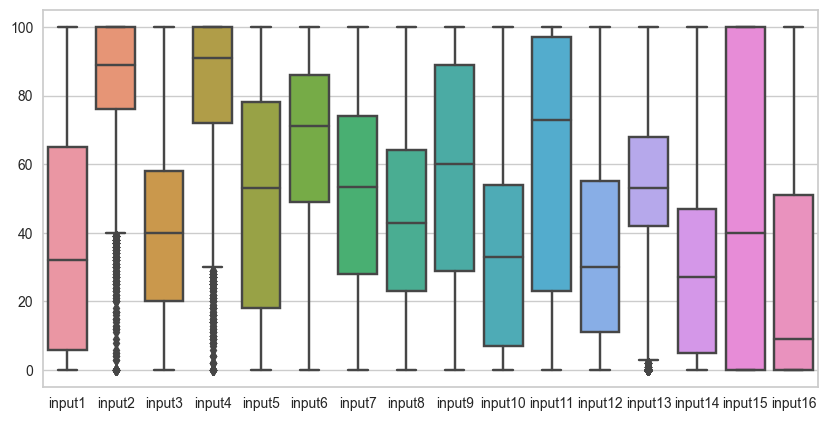

In [85]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df1.drop("class", axis=1))

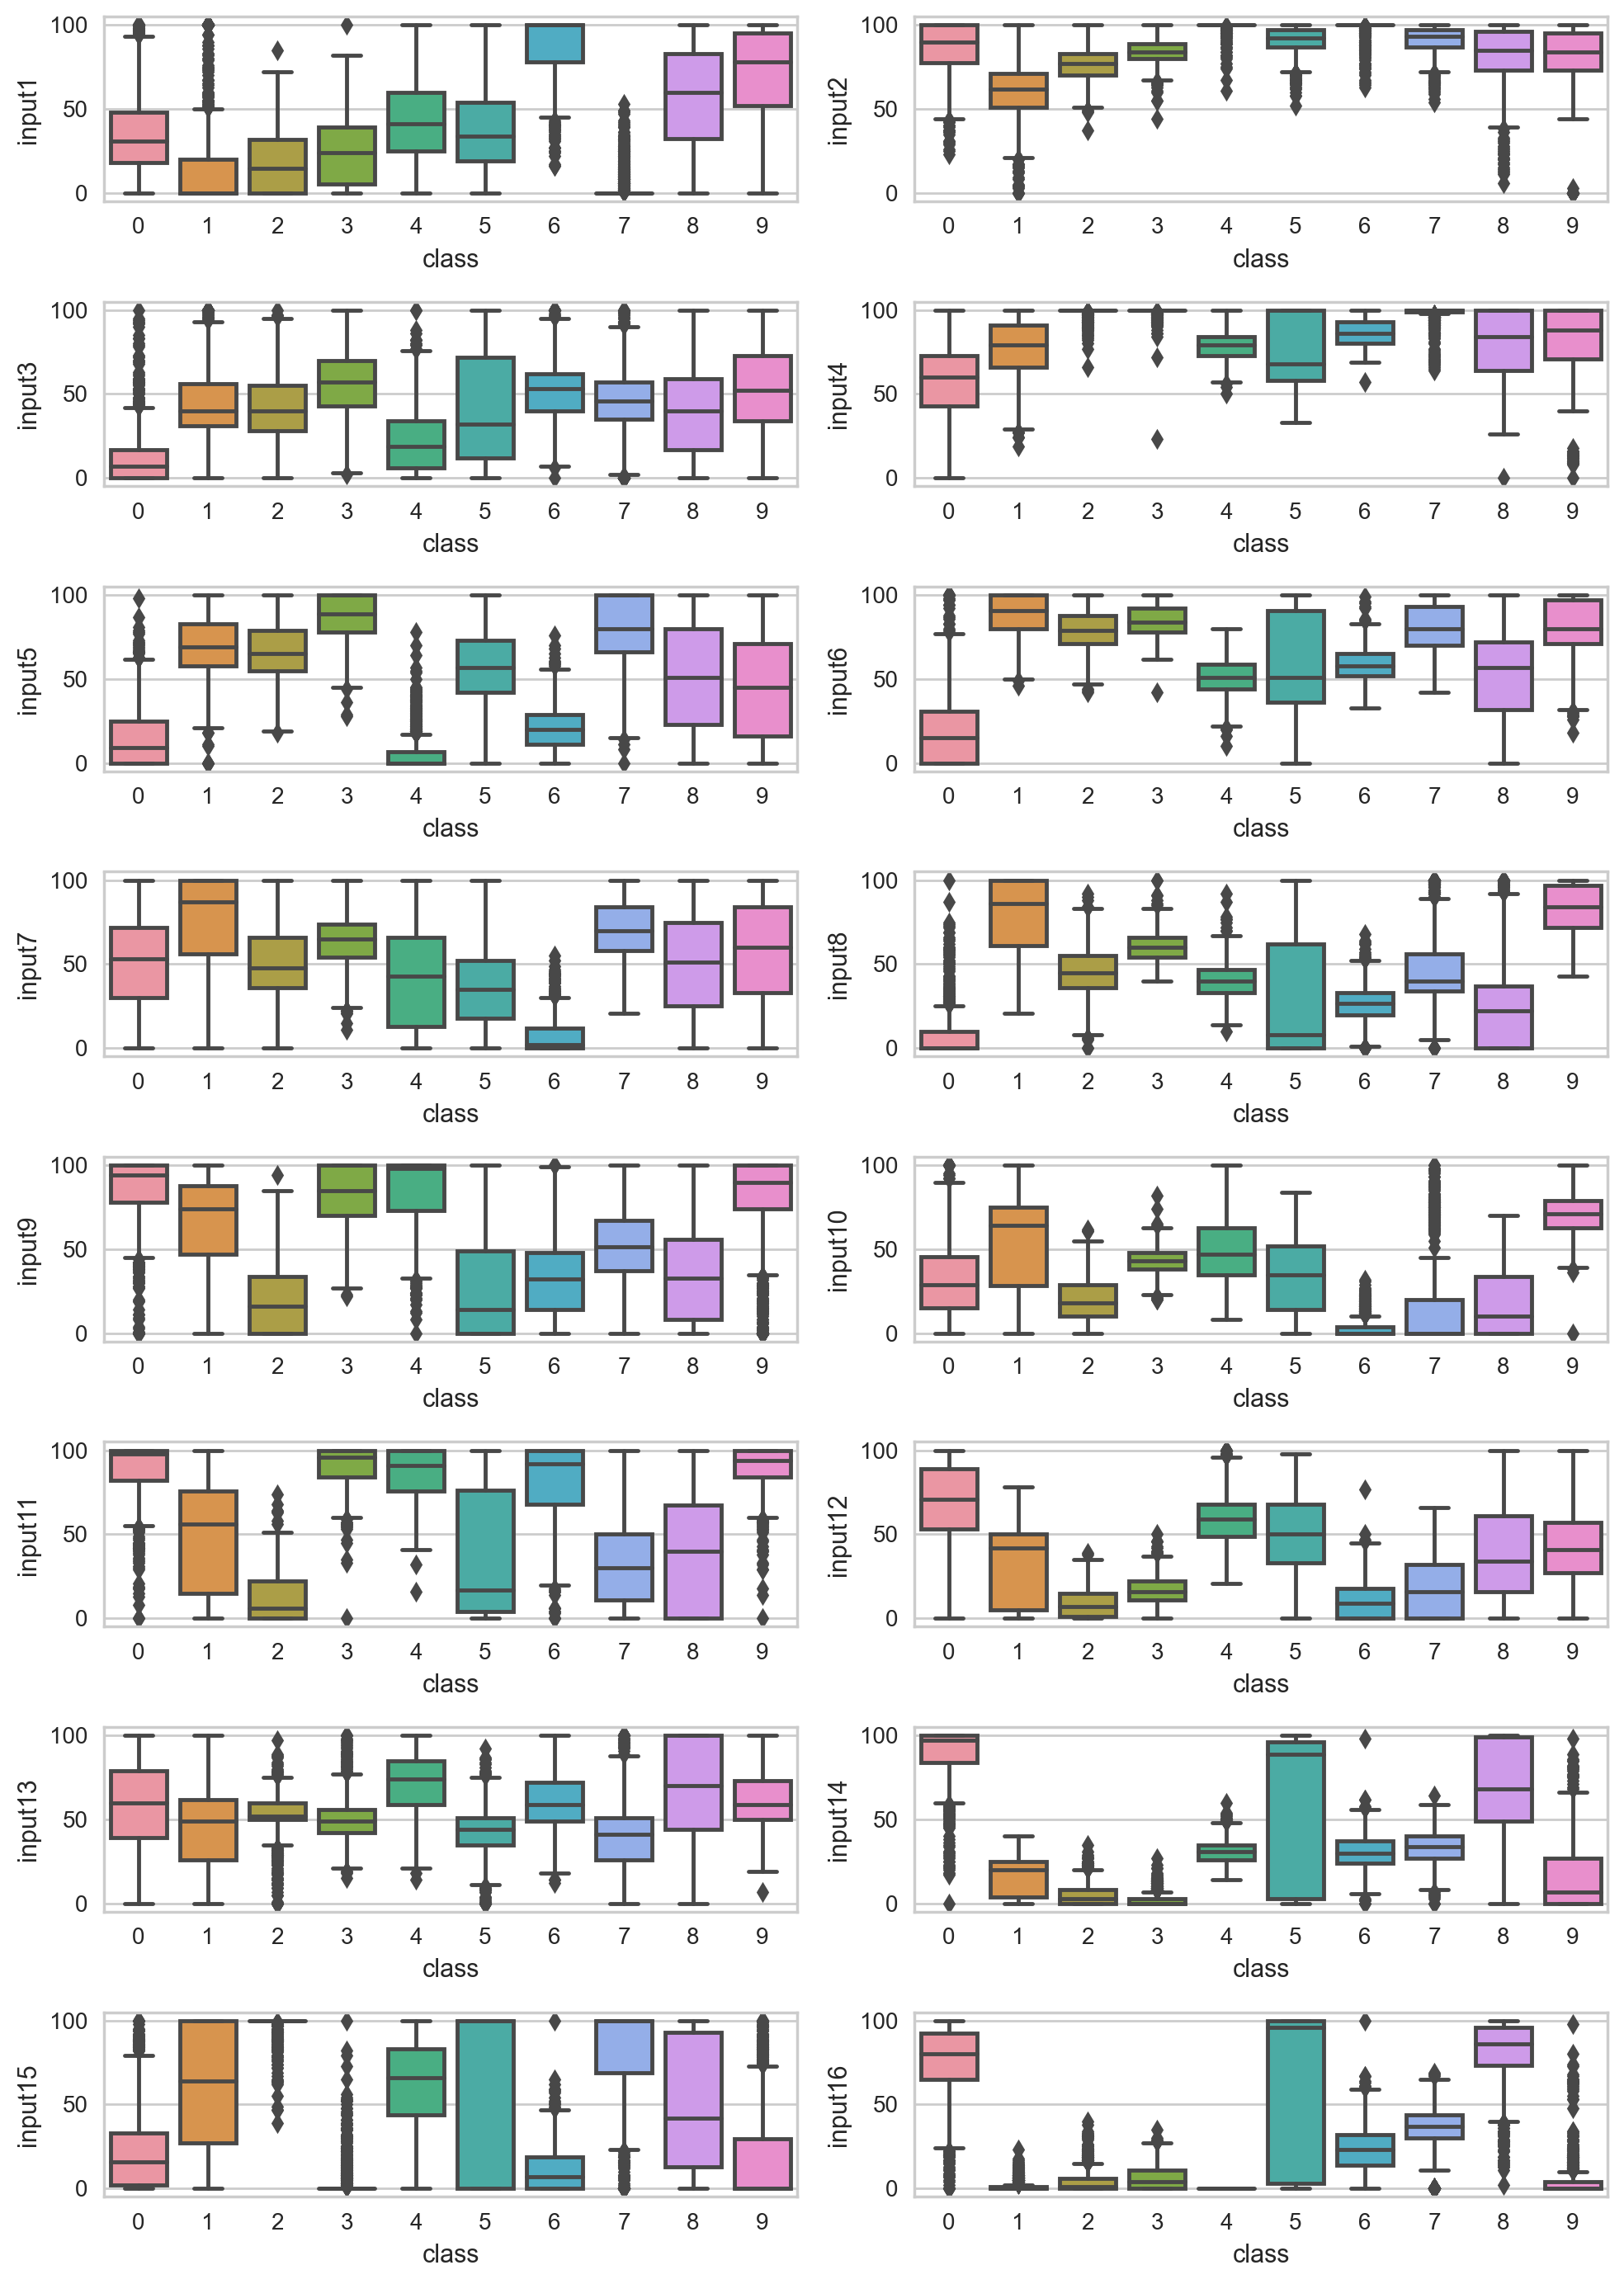

In [86]:
fig = plt.figure(figsize=(10,14), dpi=200)
for i, col in enumerate(df.columns[:-1]):
        plt.subplot(8,2,i+1)
        sns.boxplot(y= df[col], x = df["class"], data=df)
plt.tight_layout();

In [87]:
len(df)-len(df1)

0

In [88]:
df1.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [89]:
for i in range(0,10) :
    print(f"the number of {i}--->{df1[df1['class'] == i].shape[0]}")

the number of 0--->1143
the number of 1--->1143
the number of 2--->1144
the number of 3--->1055
the number of 4--->1144
the number of 5--->1055
the number of 6--->1056
the number of 7--->1142
the number of 8--->1055
the number of 9--->1055


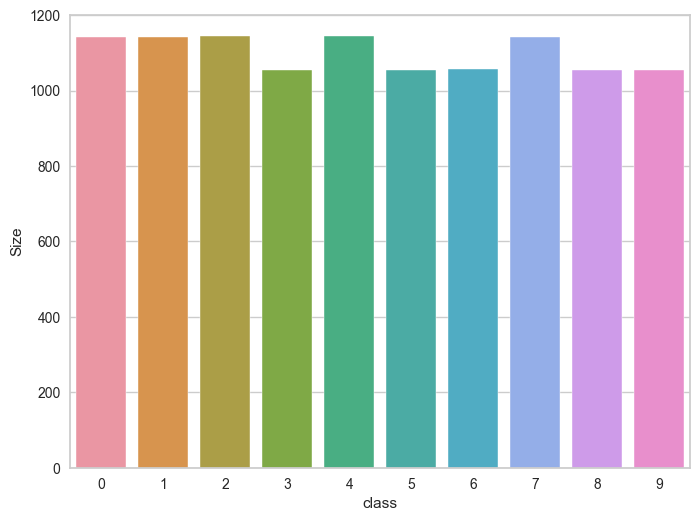

In [90]:
class_digit = df1.groupby('class').size()
class_label = pd.DataFrame(class_digit,columns = ['Size'])
plt.figure(figsize = (8,6))
sns.barplot(x = class_label.index, y = 'Size', data = class_label);

In [91]:
#this is seem like a balanced data.but we can check the distribution additionaly, each class in terms of percentages 

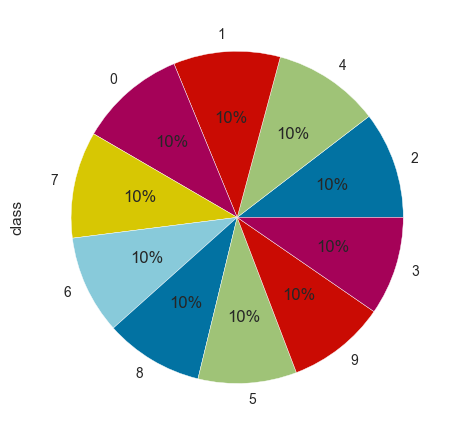

In [92]:
df["class"].value_counts().plot.pie(autopct='%1.0f%%'); #we see again that has been balanced data 

### Now, let's take a closer look at correlation of continuous columns.

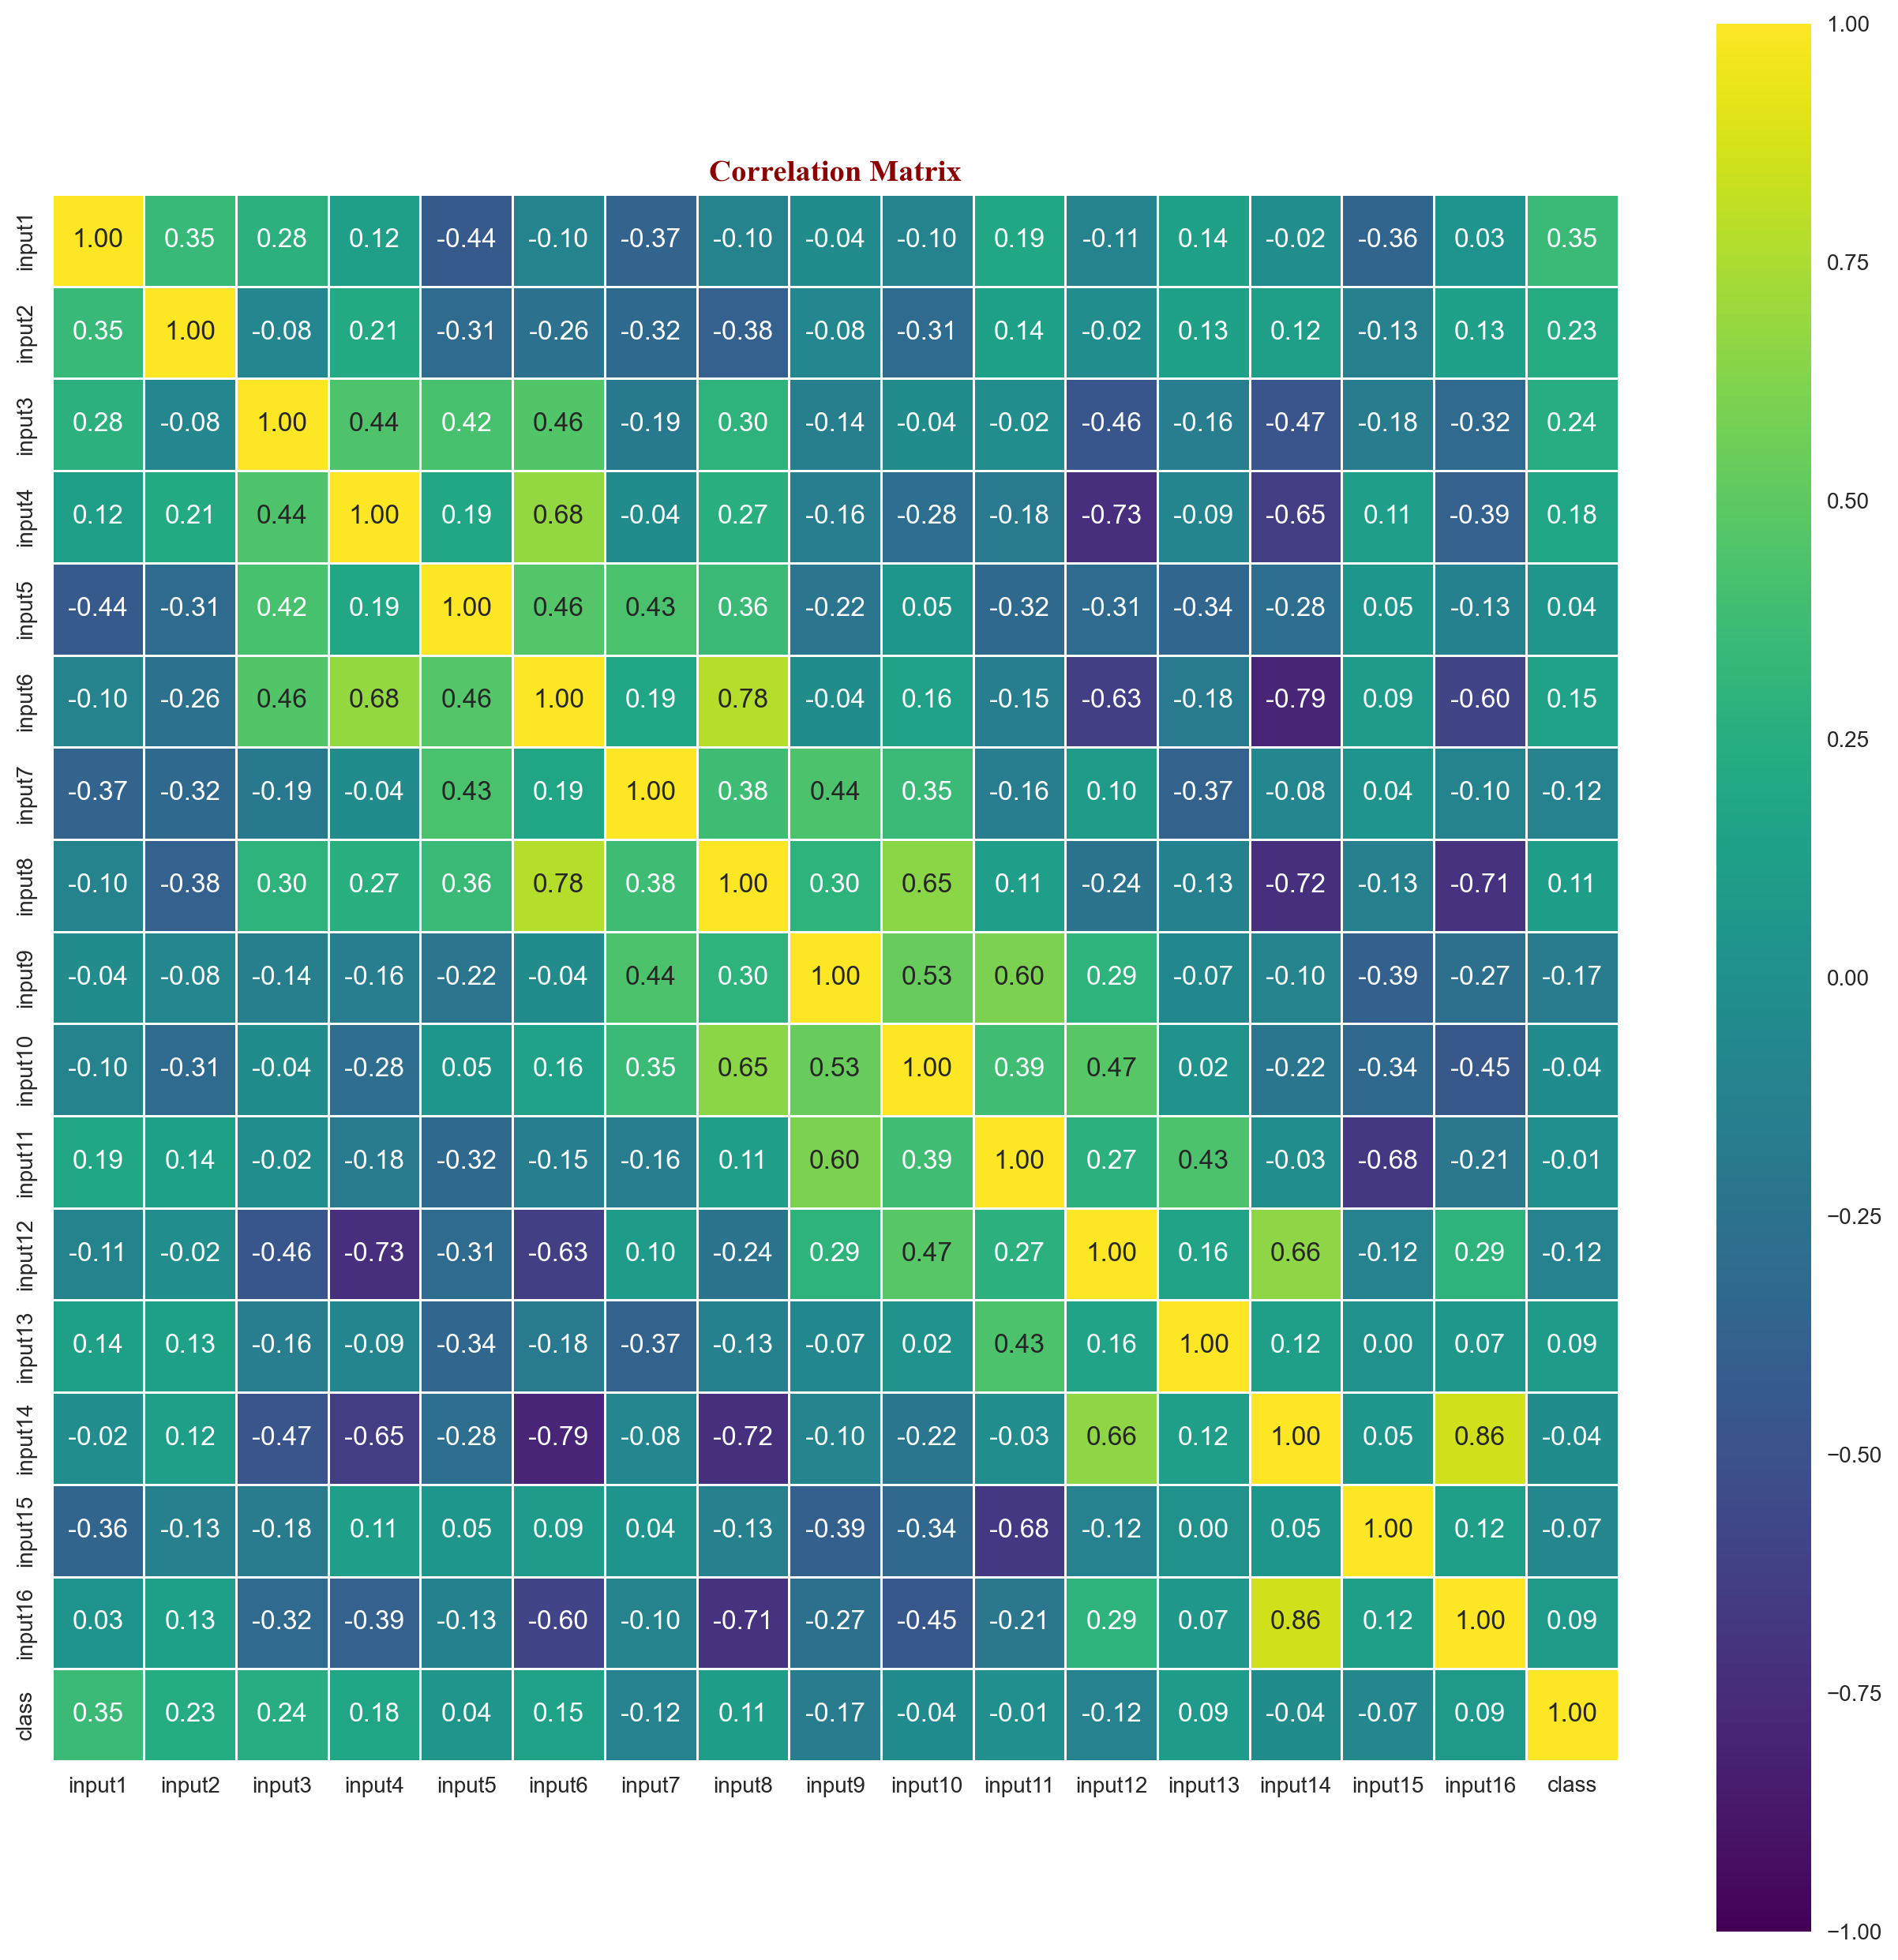

In [93]:
corr_matrix = df1.corr()

plt.figure(figsize=(16, 16), dpi=200)
sns.heatmap(corr_matrix,square=True, annot=True, fmt=".2f", annot_kws={"size": 12}, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix", fontdict=font_title)

plt.show()

In [94]:
df1.to_csv("handdigit_EDA.csv", index = False)

***
***

## 3. Prediction (Multi-class Classification)

In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``SVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report
 - ROC/AUC Curve

### Import Libraries

In [95]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,f1_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier
from yellowbrick.classifier import ClassPredictionError, ROCAUC

In [96]:
pip install xgboost


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [97]:
df = pd.read_csv("handdigit_EDA.csv")

In [98]:
df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [99]:
X = df.drop("class", axis = 1)

y = df["class"]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
# We have to saparete without shuffling to prevent data leakage over classes. 
# If we use shuffle same written digits from the same person can be in either 
# test and train side, and overlaping between the sets cause leaky validation.

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)


Vanilla SVC

In [101]:
scaler = MinMaxScaler() # will be used later in pipeline

In [102]:
modelSVM =  SVC(kernel="rbf") # will be used later in pipeline

In [103]:
from sklearn.pipeline  import Pipeline

modelSVM = Pipeline([("scaler",scaler),("SVM",modelSVM)]) # pipeline is used to combine the steps of the model

In [104]:
modelSVM.fit(X_train , y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('SVM', SVC())])

In [105]:
y_pred_test = modelSVM.predict(X_test)
y_pred_train = modelSVM.predict(X_train)

In [106]:
SVM_accuracy_test = accuracy_score(y_test, y_pred_test)
SVM_accuracy_train = accuracy_score(y_train, y_pred_train)

svm_f1_test = f1_score(y_test, y_pred_test, average='macro')
svm_f1_train = f1_score(y_train, y_pred_train, average='macro')

SVM_accuracy_test, SVM_accuracy_train, svm_f1_test, svm_f1_train

(0.9894468704512372,
 0.9959970887918487,
 0.9895711417284282,
 0.9959816991094597)

In [107]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))

print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))

TEST CM
 [[270   0   0   0   0   0   0   0   2   0]
 [  0 283   7   0   1   0   0   1   0   0]
 [  0   1 293   0   0   0   0   0   0   0]
 [  0   0   0 277   0   0   0   0   0   1]
 [  0   0   0   0 288   2   0   0   0   0]
 [  0   0   0   3   0 263   0   0   0   1]
 [  0   0   0   0   0   0 264   0   0   0]
 [  0   2   2   0   0   0   0 265   0   0]
 [  0   0   0   0   0   1   0   0 255   0]
 [  0   1   0   0   0   0   0   3   1 261]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[869   1   0   0   0   0   1   0   0   0]
 [  0 841   4   5   0   0   0   1   0   0]
 [  0   3 846   0   0   0   0   1   0   0]
 [  0   1   2 771   0   1   0   1   0   1]
 [  0   0   0   0 851   2   0   1   0   0]
 [  0   0   0   2   0 783   0   0   1   2]
 [  0   0   0   0   0   1 791   0   0   0]
 [  0   0   0   0   0   0   0 873   0   0]
 [  0   0   0   0   0   0   0   1 798   0]
 [  0   1   0   0   0   0   0   0   0 788]]
TEST REPORT 
               precision    recall  f1-score

#### SVC GridsearchCV

In [108]:
param_grid = {'SVM__C': np.linspace(1,1.3, 10),
              'SVM__gamma' : ["scale","auto"]    
            }

In [109]:
model = Pipeline([("scaler",scaler),("SVM", SVC(kernel="rbf"))]) 

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=2,
                              scoring="accuracy",
                              refit=True,
                              n_jobs=-1)

svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('SVM', SVC())]),
             n_jobs=-1,
             param_grid={'SVM__C': array([1.        , 1.03333333, 1.06666667, 1.1       , 1.13333333,
       1.16666667, 1.2       , 1.23333333, 1.26666667, 1.3       ]),
                         'SVM__gamma': ['scale', 'auto']},
             scoring='accuracy', verbose=2)

In [110]:
svm_model_grid.best_params_

{'SVM__C': 1.1666666666666667, 'SVM__gamma': 'scale'}

In [111]:
svm_model_grid.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()), ('SVM', SVC(C=1.1666666666666667))])

In [112]:
y_pred_test = svm_model_grid.predict(X_test)
y_pred_train = svm_model_grid.predict(X_train)

In [113]:
SVM_accuracy_test = accuracy_score(y_test, y_pred_test)
SVM_accuracy_train = accuracy_score(y_train, y_pred_train)

svm_f1_test = f1_score(y_test, y_pred_test, average='macro')
svm_f1_train = f1_score(y_train, y_pred_train, average='macro')

SVM_accuracy_test, SVM_accuracy_train, svm_f1_test, svm_f1_train

(0.9898107714701602,
 0.9964822901504125,
 0.9899493981509441,
 0.9964616881331348)

In [114]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))

print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))

TEST CM
 [[271   0   0   0   0   0   0   0   1   0]
 [  0 283   7   0   1   0   0   1   0   0]
 [  0   1 293   0   0   0   0   0   0   0]
 [  0   0   0 277   0   0   0   0   0   1]
 [  0   0   0   0 288   2   0   0   0   0]
 [  0   0   0   3   0 263   0   0   0   1]
 [  0   0   0   0   0   0 264   0   0   0]
 [  0   2   2   0   0   0   0 265   0   0]
 [  0   0   0   0   0   1   0   0 255   0]
 [  0   1   0   0   0   0   0   3   1 261]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[869   1   0   0   0   0   1   0   0   0]
 [  0 842   4   4   0   0   0   1   0   0]
 [  0   1 848   0   0   0   0   1   0   0]
 [  0   1   2 771   0   1   0   1   0   1]
 [  0   0   0   0 852   1   0   1   0   0]
 [  0   0   0   2   0 783   0   0   1   2]
 [  0   0   0   0   0   1 791   0   0   0]
 [  0   0   0   0   0   0   0 873   0   0]
 [  0   0   0   0   0   0   0   1 798   0]
 [  0   1   0   0   0   0   0   0   0 788]]
TEST REPORT 
               precision    recall  f1-score

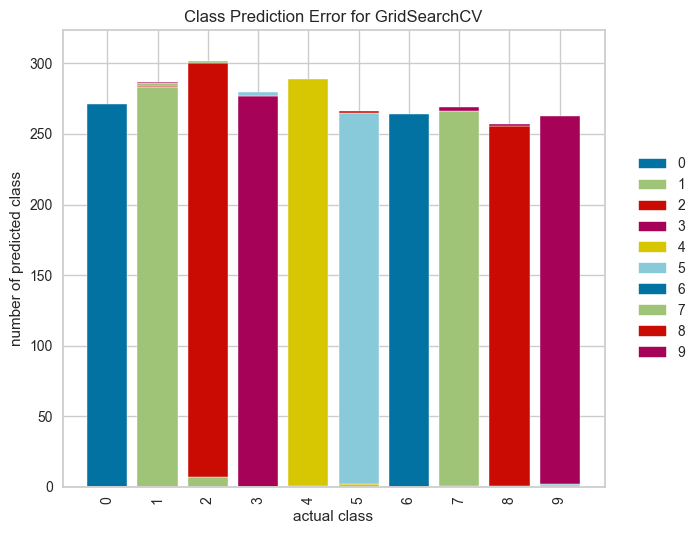

<AxesSubplot:title={'center':'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [115]:
visualizer = ClassPredictionError(svm_model_grid)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

****We can see from the plots that most of the classes are predicted correctly. But the model predicted 2 classes realtively bad.

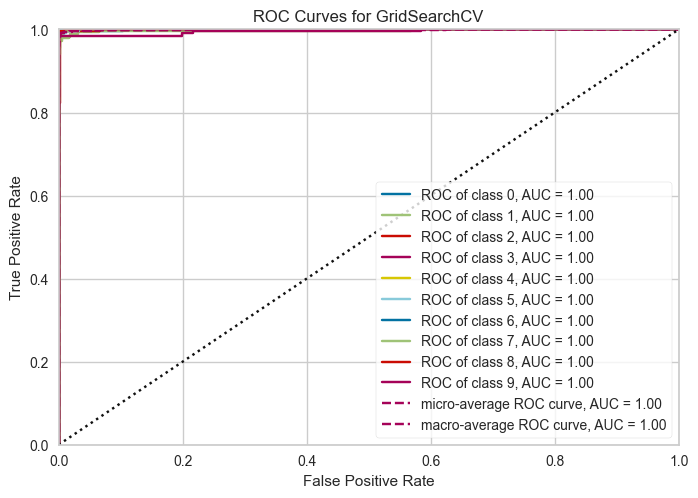

In [116]:
visualizer = ROCAUC(svm_model_grid, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                      # Finalize and render the figure

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [117]:
#modelTree = DecisionTreeClassifier()

#modelTree.fit(X_train , y_train)

In [118]:
modelTree = BaggingClassifier(DecisionTreeClassifier(), n_jobs=-1, max_samples=.2,n_estimators=10)

modelTree.fit(X_train , y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.2,
                  n_jobs=-1)

In [119]:
y_pred_test = modelTree.predict(X_test)
y_pred_train = modelTree.predict(X_train)

In [120]:
modelTree_accuracy_test = accuracy_score(y_test, y_pred_test)
modelTree_accuracy_train = accuracy_score(y_train, y_pred_train)

modelTree_f1_test = f1_score(y_test, y_pred_test, average='macro')
modelTree_f1_train = f1_score(y_train, y_pred_train, average='macro')

modelTree_accuracy_test, modelTree_accuracy_train, modelTree_f1_test, modelTree_f1_train

(0.9566957787481805,
 0.9856865599223678,
 0.9569221453063232,
 0.9857116790924394)

In [121]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))

print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))

TEST CM
 [[255   0   0   0   1   0   1   0  15   0]
 [  0 275  14   0   0   0   0   3   0   0]
 [  0   8 284   1   0   1   0   0   0   0]
 [  0   4   0 274   0   0   0   0   0   0]
 [  0   1   0   0 286   0   0   1   0   2]
 [  0   0   0  11   0 246   1   0   2   7]
 [  0   1   0   0   0   1 261   0   1   0]
 [  0  13   4   0   5   0   0 244   2   1]
 [  2   0   0   0   0   0   0   0 254   0]
 [  0   6   0   4   0   3   0   2   1 250]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[860   1   0   0   4   0   0   0   6   0]
 [  0 834  10   4   0   0   1   1   0   1]
 [  0  12 837   0   0   0   0   1   0   0]
 [  0   6   3 764   0   1   0   1   0   2]
 [  1   0   0   1 844   0   0   4   0   4]
 [  0   1   0   7   0 775   0   0   3   2]
 [  2   1   1   0   2   1 785   0   0   0]
 [  0   1   3   4   0   0   0 862   1   2]
 [  6   0   0   0   0   1   1   2 789   0]
 [  1   3   0   2   3   3   0   0   1 776]]
TEST REPORT 
               precision    recall  f1-score

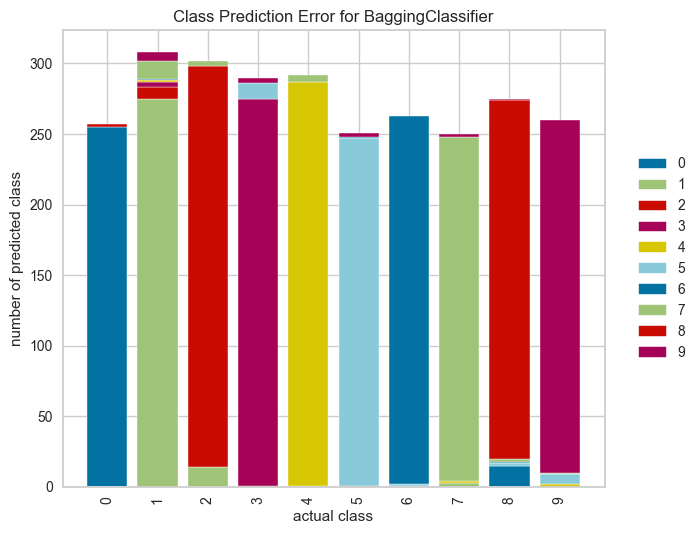

<AxesSubplot:title={'center':'Class Prediction Error for BaggingClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [122]:
visualizer = ClassPredictionError(modelTree)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

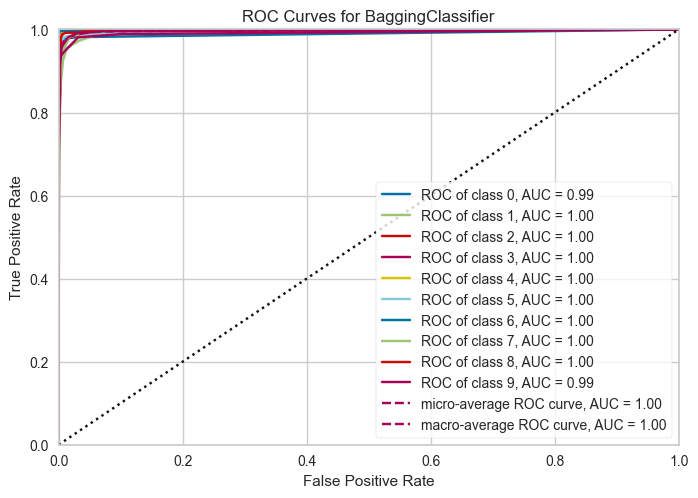

<AxesSubplot:title={'center':'ROC Curves for BaggingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [123]:
visualizer = ROCAUC(modelTree, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

#### Vanilla RF

In [124]:
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [125]:
y_pred_test = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

In [126]:
rfc_accuracy_test = accuracy_score(y_test, y_pred_test)
rfc_accuracy_train = accuracy_score(y_train, y_pred_train)

rfc_f1_test = f1_score(y_test, y_pred_test, average='macro')
rfc_f1_train = f1_score(y_train, y_pred_train, average='macro')

rfc_accuracy_test, rfc_accuracy_train, rfc_f1_test, rfc_f1_train

(0.9843522561863173, 1.0, 0.9846980035868969, 1.0)

In [127]:
print("TEST REPORT")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test, digits = 3))


print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train, digits = 3))

TEST REPORT
[[267   0   0   0   0   0   0   0   5   0]
 [  0 274  16   0   1   0   0   1   0   0]
 [  0   2 289   1   0   0   0   2   0   0]
 [  0   1   0 276   0   0   0   0   0   1]
 [  0   0   0   0 290   0   0   0   0   0]
 [  0   0   0   3   0 262   0   0   0   2]
 [  0   0   0   0   0   0 264   0   0   0]
 [  0   4   0   0   0   0   0 265   0   0]
 [  0   0   0   0   0   0   0   0 256   0]
 [  0   1   0   0   0   0   0   2   1 262]]
              precision    recall  f1-score   support

           0      1.000     0.982     0.991       272
           1      0.972     0.938     0.955       292
           2      0.948     0.983     0.965       294
           3      0.986     0.993     0.989       278
           4      0.997     1.000     0.998       290
           5      1.000     0.981     0.991       267
           6      1.000     1.000     1.000       264
           7      0.981     0.985     0.983       269
           8      0.977     1.000     0.988       256
           9    

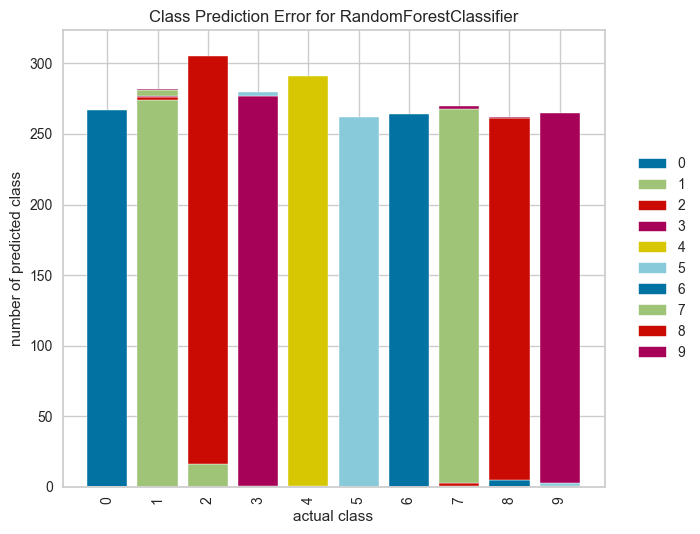

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [128]:
visualizer = ClassPredictionError(rfc)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

#### RF GridsearchCV

In [129]:
param_grid = {
             'criterion': ["entropy","gini"],
             'max_depth':[7,8],
             'max_features':['auto', 0.8],
             'max_leaf_nodes': [180,200],
             'n_estimators':[50,100],
             }

In [130]:
rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=2,
                             scoring="accuracy",
                             refit=True,
                             n_jobs=-1)

rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [7, 8],
                         'max_features': ['auto', 0.8],
                         'max_leaf_nodes': [180, 200],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [131]:
rf_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 0.8,
 'max_leaf_nodes': 200,
 'n_estimators': 50}

In [132]:
y_pred_test = rf_grid_model.predict(X_test)
y_pred_train = rf_grid_model.predict(X_train)

In [133]:
rfc_accuracy_test = accuracy_score(y_test, y_pred_test)
rfc_accuracy_train = accuracy_score(y_train, y_pred_train)

rfc_f1_test = f1_score(y_test, y_pred_test, average='macro')
rfc_f1_train = f1_score(y_train, y_pred_train, average='macro')

rfc_accuracy_test, rfc_accuracy_train, rfc_f1_test, rfc_f1_train

(0.9745269286754003,
 0.9935710819990295,
 0.9749004140944498,
 0.9935527522444279)

In [134]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))
print("-*"*30)
print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))

TEST CM
 [[267   0   0   0   0   0   0   0   5   0]
 [  0 270  20   0   1   0   0   1   0   0]
 [  0   3 288   1   0   0   0   2   0   0]
 [  0   2   0 275   0   1   0   0   0   0]
 [  0   0   0   0 289   0   0   0   0   1]
 [  0   0   0   7   0 252   0   0   0   8]
 [  0   0   0   0   0   0 263   0   1   0]
 [  0   4   4   2   0   0   0 259   0   0]
 [  2   0   0   0   0   0   0   0 254   0]
 [  0   1   0   1   0   0   0   2   1 261]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[871   0   0   0   0   0   0   0   0   0]
 [  0 825  17   9   0   0   0   0   0   0]
 [  0   1 846   2   0   0   0   1   0   0]
 [  0   3   2 768   0   1   0   2   0   1]
 [  0   0   0   0 853   0   0   0   0   1]
 [  0   0   0   4   0 783   0   0   0   1]
 [  0   0   0   0   1   1 790   0   0   0]
 [  0   0   1   1   0   0   0 871   0   0]
 [  0   0   0   0   0   0   0   0 799   0]
 [  0   1   0   2   1   0   0   0   0 785]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

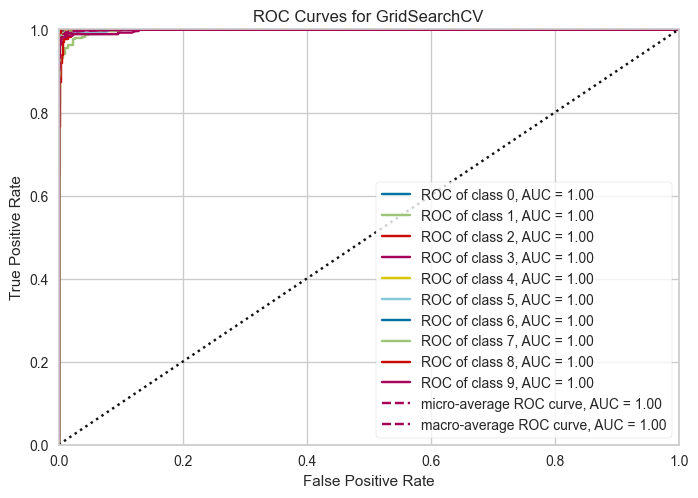

<AxesSubplot:title={'center':'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [135]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(rf_grid_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

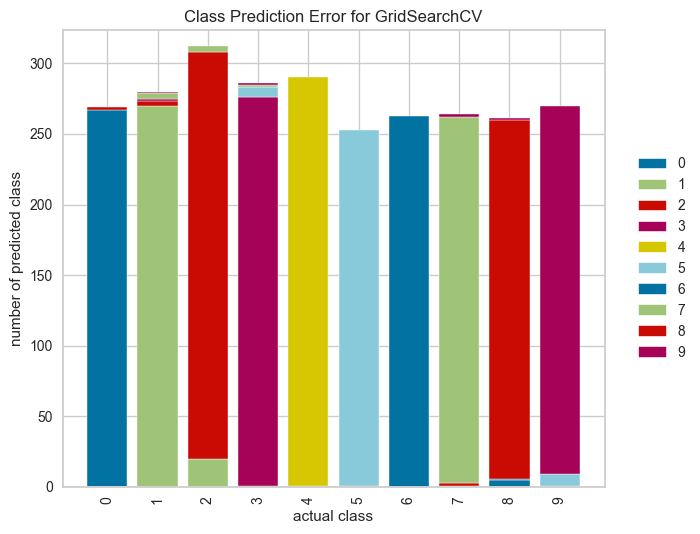

<AxesSubplot:title={'center':'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [136]:
visualizer = ClassPredictionError(rf_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [ ]:
Vanilla XGB

In [137]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [138]:
y_pred_test = xgb_classifier.predict(X_test)
y_pred_train = xgb_classifier.predict(X_train)

In [139]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))
print("-*"*30)
print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))

TEST CM
 [[265   0   0   0   0   0   0   0   7   0]
 [  0 282   7   0   0   1   0   2   0   0]
 [  0   2 291   0   0   0   0   1   0   0]
 [  0   0   0 278   0   0   0   0   0   0]
 [  0   0   0   0 290   0   0   0   0   0]
 [  0   0   0   2   0 259   1   1   0   4]
 [  0   0   1   0   0   2 261   0   0   0]
 [  0   4   2   1   4   0   1 254   0   3]
 [  2   0   0   0   0   0   0   0 254   0]
 [  0   0   0   6   0   0   0   1   1 258]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[871   0   0   0   0   0   0   0   0   0]
 [  0 851   0   0   0   0   0   0   0   0]
 [  0   0 850   0   0   0   0   0   0   0]
 [  0   0   0 777   0   0   0   0   0   0]
 [  0   0   0   0 854   0   0   0   0   0]
 [  0   0   0   0   0 788   0   0   0   0]
 [  0   0   0   0   0   0 792   0   0   0]
 [  0   0   0   0   0   0   0 873   0   0]
 [  0   0   0   0   0   0   0   0 799   0]
 [  0   0   0   0   0   0   0   0   0 789]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

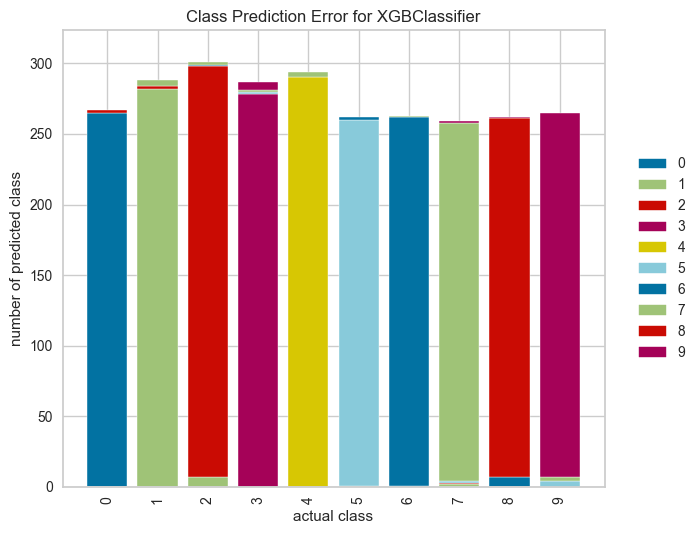

<AxesSubplot:title={'center':'Class Prediction Error for XGBClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [140]:
visualizer = ClassPredictionError(xgb_classifier)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

In [ ]:
XBGClassifier GridsearchCV

In [141]:
# These hyperparamaters found after long tirals. 
# You also can change and make some trials. 
# If you reach better scores, please let us know.
param_grid = {'n_estimators':[137],
             'learning_rate': [0.1890930861960677],
             'min_child_weight' : [2],
             'max_depth':[4],
             'subsample': [0.19171391113864972],
             'gamma': [0.016657026615236145],
             'colsample_bytree': [0.904782626896807],
             'reg_alpha' : [9.386969512581851e-06], 
             'reg_lambda' : [1.3162789863573587e-08]}

In [142]:
xgb_model =   XGBClassifier()
xgb_grid_model = GridSearchCV(xgb_model,
                             param_grid,
                             verbose=1,
                             scoring="accuracy",
                             refit=True,
                             n_jobs=-1)

xgb_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.904782626896807],
                         'gamma': [0.016657026615236145],
                         'learning_rate': [0.18909

In [143]:
xgb_grid_model.best_params_

{'colsample_bytree': 0.904782626896807,
 'gamma': 0.016657026615236145,
 'learning_rate': 0.1890930861960677,
 'max_depth': 4,
 'min_child_weight': 2,
 'n_estimators': 137,
 'reg_alpha': 9.386969512581851e-06,
 'reg_lambda': 1.3162789863573587e-08,
 'subsample': 0.19171391113864972}

{'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 4, 'min_split_loss': 1, 'n_estimators': 200, 'reg_lambda': 1, 'subsample': 0.7}

In [144]:
y_pred_test = xgb_grid_model.predict(X_test)
y_pred_train = xgb_grid_model.predict(X_train)

In [145]:
xgb_accuracy_test = accuracy_score(y_test, y_pred_test)
xgb_accuracy_train = accuracy_score(y_train, y_pred_train)

xgb_f1_test = f1_score(y_test, y_pred_test, average='macro')
xgb_f1_train = f1_score(y_train, y_pred_train, average='macro')

xgb_accuracy_test, xgb_accuracy_train, xgb_f1_test, xgb_f1_train

(0.977802037845706, 0.9986656962639495, 0.9778614280539945, 0.9986576065869549)

In [146]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))
print("-*"*30)
print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))

TEST CM
 [[265   0   0   0   0   0   0   0   7   0]
 [  0 280   9   0   1   0   0   2   0   0]
 [  0   3 290   0   0   0   0   1   0   0]
 [  0   1   0 276   0   1   0   0   0   0]
 [  0   0   0   0 290   0   0   0   0   0]
 [  0   0   0   5   1 256   0   1   1   3]
 [  0   0   0   0   0   1 263   0   0   0]
 [  0   5   2   4   0   0   0 256   0   2]
 [  1   0   0   0   0   0   0   1 254   0]
 [  0   2   0   4   0   0   0   2   1 257]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[870   0   0   0   0   0   0   0   0   1]
 [  0 851   0   0   0   0   0   0   0   0]
 [  0   1 848   0   0   0   0   1   0   0]
 [  0   1   2 772   0   0   0   1   0   1]
 [  0   0   0   0 854   0   0   0   0   0]
 [  0   0   0   0   0 787   0   0   1   0]
 [  0   0   0   0   0   1 791   0   0   0]
 [  0   1   0   0   0   0   0 872   0   0]
 [  0   0   0   0   0   0   0   0 799   0]
 [  0   0   0   0   0   0   0   0   0 789]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

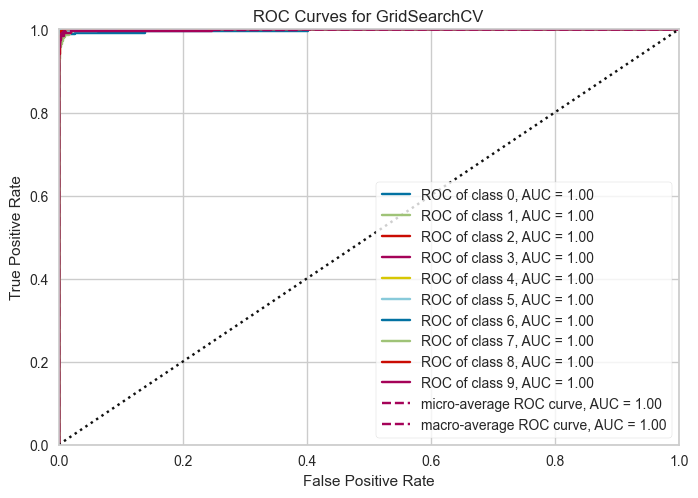

<AxesSubplot:title={'center':'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [147]:
visualizer = ROCAUC(xgb_grid_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data

visualizer.show()                       # Finalize and render the figure

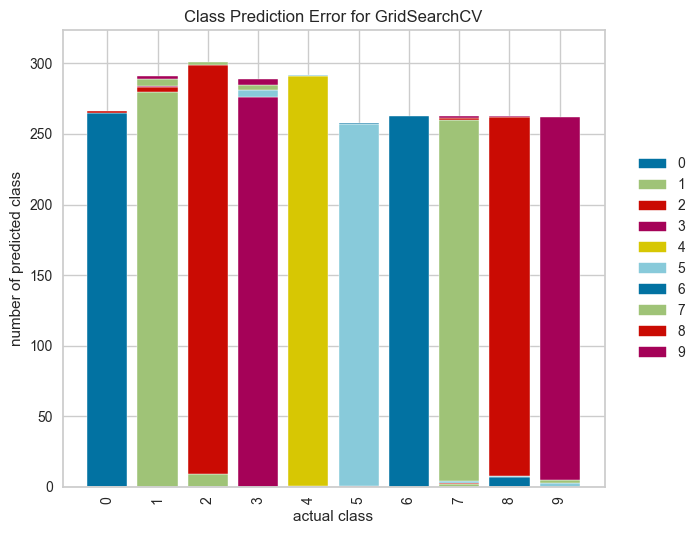

[CV] END .......................SVM__C=1.0, SVM__gamma=scale; total time=   2.5s
[CV] END .......................SVM__C=1.0, SVM__gamma=scale; total time=   1.1s
[CV] END ........................SVM__C=1.0, SVM__gamma=auto; total time=   2.4s
[CV] END ........SVM__C=1.0333333333333334, SVM__gamma=scale; total time=   1.0s
[CV] END .........SVM__C=1.0333333333333334, SVM__gamma=auto; total time=   2.3s
[CV] END .........SVM__C=1.0333333333333334, SVM__gamma=auto; total time=   2.2s
[CV] END .........SVM__C=1.0666666666666667, SVM__gamma=auto; total time=   2.2s
[CV] END .......................SVM__C=1.1, SVM__gamma=scale; total time=   1.0s
[CV] END .......................SVM__C=1.1, SVM__gamma=scale; total time=   1.0s
[CV] END ........................SVM__C=1.1, SVM__gamma=auto; total time=   2.2s
[CV] END ........SVM__C=1.1333333333333333, SVM__gamma=scale; total time=   1.0s
[CV] END ........SVM__C=1.1333333333333333, SVM__gamma=scale; total time=   1.0s
[CV] END .........SVM__C=1.1

[CV] END .......................SVM__C=1.0, SVM__gamma=scale; total time=   2.6s
[CV] END ........................SVM__C=1.0, SVM__gamma=auto; total time=   2.5s
[CV] END ........................SVM__C=1.0, SVM__gamma=auto; total time=   2.2s
[CV] END .........SVM__C=1.0333333333333334, SVM__gamma=auto; total time=   2.3s
[CV] END ........SVM__C=1.0666666666666667, SVM__gamma=scale; total time=   1.1s
[CV] END .........SVM__C=1.0666666666666667, SVM__gamma=auto; total time=   2.2s
[CV] END .........SVM__C=1.0666666666666667, SVM__gamma=auto; total time=   2.2s
[CV] END ........................SVM__C=1.1, SVM__gamma=auto; total time=   2.2s
[CV] END ........SVM__C=1.1333333333333333, SVM__gamma=scale; total time=   1.0s
[CV] END ........SVM__C=1.1333333333333333, SVM__gamma=scale; total time=   1.0s
[CV] END .........SVM__C=1.1333333333333333, SVM__gamma=auto; total time=   2.2s
[CV] END ........SVM__C=1.1666666666666667, SVM__gamma=scale; total time=   1.0s
[CV] END ........SVM__C=1.16

In [148]:
visualizer = ClassPredictionError(xgb_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

## 5. Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

## 6. Accuracy Comparison

Text(0.5, 1.0, 'Test Accuracy Score of Different Models')

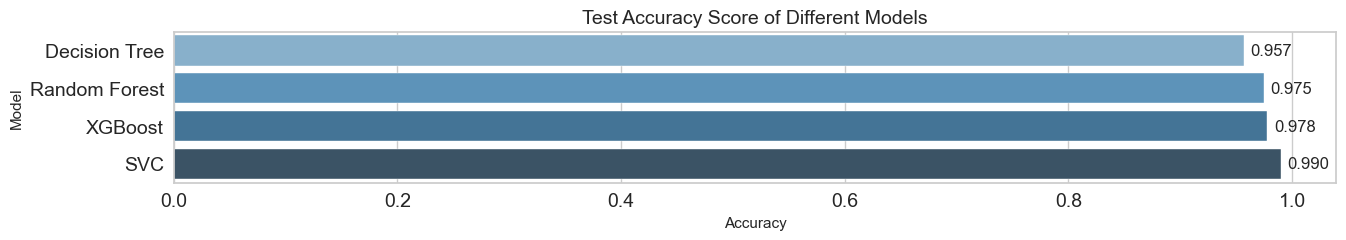

In [149]:
compare = pd.DataFrame({"Model": ["SVC", "Random Forest", "XGBoost", "Decision Tree"],
                        "Accuracy": [SVM_accuracy_test, rfc_accuracy_test, xgb_accuracy_test, modelTree_accuracy_test]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(15,2))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.9),
                xytext=(5, 10), textcoords='offset points')
# ax.bar_label(ax.containers[0], label_type='edge') # if you get an error for bar_label upgrade matplolib
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test Accuracy Score of Different Models", size=14)

## 7. F1 Score Comparison

Text(0.5, 1.0, 'Test F1 Score of Different Models')

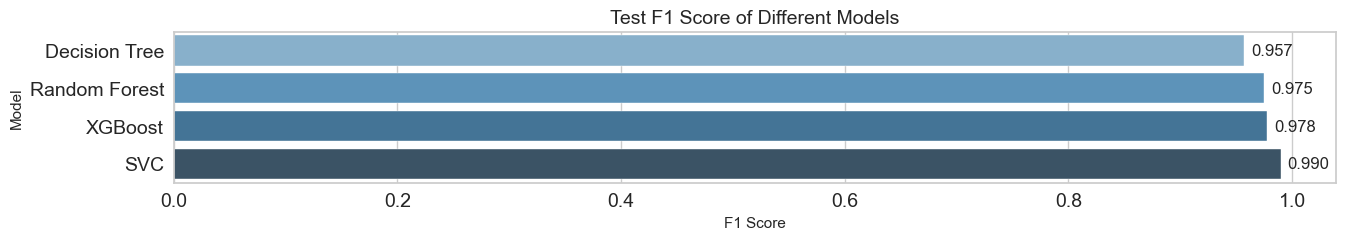

In [150]:
compare = pd.DataFrame({"Model": ["SVC", "Random Forest", "XGBoost", "Decision Tree"],
                        "F1 Score": [svm_f1_test, rfc_f1_test, xgb_f1_test, modelTree_f1_test]})

compare = compare.sort_values(by="F1 Score", ascending=True)

plt.figure(figsize=(15,2))
ax = sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + .9),
                xytext=(5, 10), textcoords='offset points')
# ax.bar_label(ax.containers[0], label_type='edge') # if you get an error for bar_label upgrade matplolib
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test F1 Score of Different Models", size=14)

# 8. Conclusion

?????????????????????????????????????????????

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___